Install the kaggle package using pip install kaggle.
Sign in your kaggle account and download the API from https://www.kaggle.com/<q><b>username</b></q>/account <br/>
Put the .json in home/.kaggle/

Download the leaf classification dataset using.

In [191]:
import kaggle
data = kaggle.api.competition_data("leaf-classification")

Unzip images.zip and train.zip

In [192]:
import zipfile
images_zip = data + "/images.zip"
train_zip = data + "/train.csv.zip"
unzip_folder = data + "/unzip/"
image_zip_ref = zipfile.ZipFile(images_zip, 'r')
image_zip_ref.extractall(unzip_folder)
train_zip_ref = zipfile.ZipFile(train_zip, 'r')
train_zip_ref.extractall(unzip_folder)
zip_ref.close()

Let's plot some of the photos from the dataset.

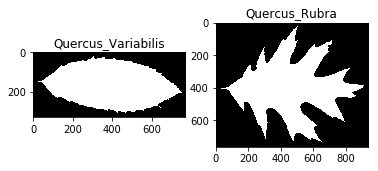

In [193]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

#Define the path for the unzipped images folder and train.csv
images_folder = unzip_folder + "images/"
train_csv = unzip_folder + "train.csv"

#Read train.csv into a pandas dataframe
train = pd.read_csv(train_csv)

#Take two images randomly from the dataset
image_6 = mpimg.imread(images_folder + '6.jpg')
image_11 = mpimg.imread(images_folder + '11.jpg')

#Get the species name for image with id 6 and 11
species_for_image6 = train.loc[train['id'] == 6].iloc[0]['species']
species_for_image11 = train.loc[train['id'] == 11].iloc[0]['species']

#Plot the two images with corresponding species
plt.subplot(1, 2, 1)
plt.title(species_for_image6)
plt.imshow(image_6, cmap='gray')
plt.subplot(1, 2, 2)
plt.title(species_for_image11)
plt.imshow(image_11, cmap='gray')
plt.show()

Notice that image sizes are not different in the dataset.
A CNN cannot accept imput with different sizes, so if we're preparing data for entry to a CNN we need to resize by cropping oversized images
and padding small images.

Reading encoded data from common extension files is not the recommand way to enter data in Tensorflow
Rather tensorflow has invented its own extension TFrecords, the extension is essentially a string of bytes in a file.
Storing data in this manner will result in more performance when reading from or writing to data.
The trouble in R/W operations is the HDD storage is slow in reading files especially if they are distributed
in different sectors of the HDD.

We need to make a list of image file path in order to binarize them and put them in a tesnorflow example.
Kaggle provided two csv's one containing training data : image_id, leaf species and list of features for the training and a test csv that ommits the leaf species. This will force us to read from the training csv and make image file paths from based on the image_id column rather then directly from the image folder to avoid appending images unlabeled species to the dataset.

To standardize image sizes without losing any information because of aspect ratio we will add a padding of zeros
in the image outline which have width and height smaller then the max height and width in the dataset 

For convenience let's add a column to the train csv containing the image path for each row

In [194]:
#append a column to the csv contaning the image path for every raw
images_extension = ".jpg"
train["image_path"] = images_folder + train["id"].astype(str) +images_extension
#Print the added row
train[["id", "image_path"]]

,id,image_path
0,1,/home/dude/.kaggle/competitions/leaf-classific...
1,2,/home/dude/.kaggle/competitions/leaf-classific...
2,3,/home/dude/.kaggle/competitions/leaf-classific...
3,5,/home/dude/.kaggle/competitions/leaf-classific...
4,6,/home/dude/.kaggle/competitions/leaf-classific...
5,8,/home/dude/.kaggle/competitions/leaf-classific...
6,10,/home/dude/.kaggle/competitions/leaf-classific...
7,11,/home/dude/.kaggle/competitions/leaf-classific...
8,14,/home/dude/.kaggle/competitions/leaf-classific...
9,15,/home/dude/.kaggle/competitions/leaf-classific...


Calculate the max width of max height along the dataset

In [195]:
import numpy as np
from PIL import Image
def max_width_height(image_paths):
    max_width = 0
    max_height = 0
    for image_path in image_paths:
        image = np.array(Image.open(image_path))
        image_height = image.shape[0]
        image_width = image.shape[1]
        max_height = image_height if max_height < image_height else max_height
        max_width = image_width if max_width < image_width else max_width
    return max_height, max_width
max_height, max_width = max_width_height(train["image_path"])
print("max image height : {}px, max image width : {}px".format(max_height, max_width))

max image height : 1089px, max image width : 1633px


Constructing the model on the whole dataset is not recommended especially if the specs of the running machine are low.
We need to restrict the number of training images to just 2 images per class, we will use the entire dataset after making sure the model works smoothly

In [196]:
#Sort the dataframe by the species column
train_sorted = train.sort_values("species")
#Group by species and take just 2 raws per species
number_of_images_per_species = 2
train_truncated = train_sorted.groupby("species").head(number_of_images_per_species)
train_truncated

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,image_path
111,201,Acer_Capillipes,0.001953,0.000000,0.017578,0.001953,0.054688,0.001953,0.019531,0.000000,...,0.000000,0.011719,0.000000,0.019531,0.000000,0.000000,0.000000,0.029297,0.025391,/home/dude/.kaggle/competitions/leaf-classific...
951,1525,Acer_Capillipes,0.000000,0.000000,0.013672,0.015625,0.035156,0.000000,0.023438,0.000000,...,0.000000,0.008789,0.000000,0.011719,0.000000,0.000000,0.000000,0.021484,0.000977,/home/dude/.kaggle/competitions/leaf-classific...
93,166,Acer_Circinatum,0.000000,0.000000,0.000000,0.009766,0.017578,0.000000,0.001953,0.000000,...,0.000000,0.006836,0.000000,0.010742,0.000000,0.000000,0.003906,0.000000,0.016602,/home/dude/.kaggle/competitions/leaf-classific...
607,962,Acer_Circinatum,0.000000,0.000000,0.003906,0.011719,0.029297,0.000000,0.007812,0.000000,...,0.000000,0.000977,0.000000,0.022461,0.000000,0.000000,0.020508,0.000000,0.032227,/home/dude/.kaggle/competitions/leaf-classific...
946,1519,Acer_Mono,0.025391,0.013672,0.025391,0.009766,0.003906,0.007812,0.052734,0.000000,...,0.000000,0.013672,0.000977,0.000977,0.000000,0.000000,0.000000,0.000000,0.028320,/home/dude/.kaggle/competitions/leaf-classific...
120,216,Acer_Mono,0.005859,0.001953,0.058594,0.058594,0.005859,0.000000,0.021484,0.000000,...,0.000000,0.038086,0.000000,0.002930,0.000000,0.000000,0.000000,0.000000,0.012695,/home/dude/.kaggle/competitions/leaf-classific...
934,1504,Acer_Opalus,0.015625,0.031250,0.041016,0.017578,0.009766,0.025391,0.056641,0.000000,...,0.000000,0.005859,0.000000,0.054688,0.000000,0.000000,0.000000,0.000000,0.022461,/home/dude/.kaggle/competitions/leaf-classific...
821,1320,Acer_Opalus,0.011719,0.017578,0.041016,0.007812,0.013672,0.031250,0.042969,0.000000,...,0.000000,0.009766,0.000000,0.020508,0.000000,0.000000,0.001953,0.014648,0.041992,/home/dude/.kaggle/competitions/leaf-classific...
854,1370,Acer_Palmatum,0.000000,0.000000,0.005859,0.025391,0.097656,0.003906,0.001953,0.000000,...,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040039,/home/dude/.kaggle/competitions/leaf-classific...
185,324,Acer_Palmatum,0.000000,0.000000,0.003906,0.041016,0.095703,0.000000,0.001953,0.000000,...,0.000000,0.082031,0.000000,0.002930,0.000000,0.000000,0.000000,0.000000,0.009766,/home/dude/.kaggle/competitions/leaf-classific...


We need to transform the species column to its one hot respresentation

In [210]:
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
species = train_truncated["species"]
encoder = LabelBinarizer()
encoder.fit(species)
train_truncated["species"] = species.apply(lambda leaf_species: encoder.transform([leaf_species]))
train_truncated["species"]
# encoder.inverse_transform([train_truncated["species"]])
# binary_labels[1]
# train_truncated["species"]

111    [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
951    [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
93     [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
607    [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
946    [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
120    [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
934    [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
821    [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
854    [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
185    [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
177    [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
958    [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
357    [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,...
25     [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,...
546    [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...
717    [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...
348    [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...
215    [[0, 0, 0, 0, 0, 0, 0, 0

The recommanded input format of tensorflow is TFrecords.<br> <b><q>if your input data are on disk in the recommended TFRecord format</q></b><br>
This approach makes it easier to mix and match data sets and network architectures.<br>
So let's create a TFrecord file containing our trancated dataset

In [63]:
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
tfrecords_filename = unzip_folder + "kaggle_tf_record_minified"
# tfrecords_filename = "TFrecord/kaggle_tf_record_minified"
writer = tf.python_io.TFRecordWriter(tfrecords_filename)


with tf.Session() as sess:
    for image_path, leaf_species in zip(train_truncated["image_path"], train_truncated["species"]):
        #Read image from path
        leaf_image_string = tf.read_file(image_path)
        #Decode the the read string to jpeg format
        leaf_image_decoded = tf.image.decode_image(contents=leaf_image_string)
        #Add a padding to the image
        padded_image = tf.image.resize_image_with_crop_or_pad(leaf_image_decoded, max_height, max_width)
        #Re encode image to get a string
        padded_image_encoded = tf.image.encode_jpeg(padded_image)
        #convert the string to a bytes list
        padded_image_bytes = tf.compat.as_bytes(padded_image_encoded.eval())
        #create the image feature
        leaf_image_feature = tf.train.Feature(bytes_list=tf.train.BytesList(value = [padded_image_bytes]))
        #create the species feature
#         leaf_species_encoded = leaf_species.encode('unicode-escape')
#         bytes_l = tf.train.BytesList(value = [leaf_species.tobytes])
        leaf_species_bytes = sess.run(tf.cast(leaf_species, tf.uint8)).tobytes()
#         leaf_species_bytes = tf.compat.as_bytes(leaf_species.byteswap())
        leaf_species_bytes_list = tf.train.BytesList(value = [leaf_species_bytes])
        leaf_species_feature = tf.train.Feature(bytes_list= leaf_species_bytes_list)
        #Create the feature dictionnary
        feature_dict = {
            'leaf_image' : leaf_image_feature,
            'leaf_species' : leaf_species_feature
        }
        #construct the example
        example = tf.train.Example(features=tf.train.Features(feature=feature_dict))
        #Serialize and write the example
        writer.write(example.SerializeToString())
writer.close()

Let's try and read the data from the TFrecord file ie., reverse the procedure we just did

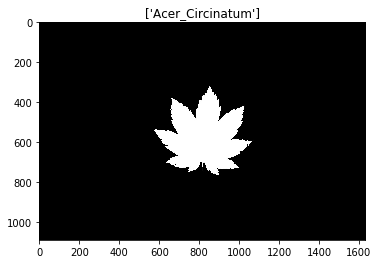

In [232]:
import tensorflow as tf
#Start an iterator over the TFrecord
record_iterator = tf.python_io.tf_record_iterator(path=tfrecords_filename)
#Take one example from the iterator
string_record = next(record_iterator)
string_record = next(record_iterator)


#parse the example
example = tf.train.Example()
example.ParseFromString(string_record)
#decode each feature
leaf_image_raw = example.features.feature["leaf_image"].bytes_list.value[0]
leaf_species = example.features.feature["leaf_species"].bytes_list.value[0]
#Decode each feature to its original format
label = tf.decode_raw(leaf_species, tf.uint8)
image = tf.image.decode_jpeg(leaf_image_raw)

# tf.image_decode_jpeg will return a tensor of shape 3, the last dimension in the tensor
#Is the channel dimension, we know that the images in the dataset are grayscaled
#In order to drop the dimension we can use tf.squeeze which "removes a dimension of size 1 from the
#Shape of an tensor"
image = tf.squeeze(image)

#Start a session to run the computational graph
with tf.Session() as sess:
    image = sess.run(image)
    label = sess.run(label)
    #the label here traces to the one hot encoding
    #To reverse the encoding to the categorial representation we simply tell the encoder we used
    #previously to revert the representation
    categorial_label = encoder.inverse_transform(np.array([label]))
    plt.title(categorial_label)
    plt.imshow(image, cmap="gray"

We have out images padded to a predefined size next we'll try LeNet CNN architecture to classify leaf images'